In [1]:
## Naive Bayes Count Vectorizer

import pandas as pd
import os
import sklearn #import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Connect dataset
yelp_data = pd.read_csv(r'/Users/rajsitee/Downloads/Eco395m-Final-Project-jordan/artifacts/mexican_reviews.csv')

In [3]:
def star_rating(x):

    if x.rating == '3 star rating':
        return 0
    elif x.rating == '2 star rating':
        return 0
    elif x.rating == '1 star rating':
        return 0
    elif x.rating == '4 star rating':
        return 1
    elif x.rating == '5 star rating':
        return 1
    else:
        return 0
yelp_data['rating_binary'] = yelp_data.apply(star_rating,axis = 1)

In [4]:
# new pure text based dataset

X = yelp_data.review
y = yelp_data.rating_binary
indices = yelp_data.index

In [7]:
# same split, size and random state
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, train_size = 0.8, random_state = 7)
print(X_train)

35541    Penny Wise Pound Foolish  Came in Sat afternoo...
25124    Excellent food, wonderful Austin atmosphere.  ...
51977    Yummy tacos. Huge menu, that includes all day ...
64798    Why are you doing this to me?! What have I eve...
22157    Come here if you're sick of Tex-Mex!  Let's ju...
                               ...                        
53459    I've been here a few times. I had the sirloin ...
10742    The food is good, b its hard for the employees...
49689    Goat soup and a friendly owner will warm your ...
58564    We loved our trip to El Arroyo!  We went for b...
61615    easily the worst chipotle to exist  the worker...
Name: review, Length: 55635, dtype: object


In [8]:
steps = [('vec', CountVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 1000], 'nb__alpha':[0.01, 0.1, 1, 10, 1000]}

def new_func(pipeline, parameters):
    clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy")
    return clf

clf = new_func(pipeline, parameters) 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 0.01, 'vec__min_df': 10}

In [9]:
import pickle

filename = 'nb_cv.sav'
pickle.dump(clf, open(filename, 'wb'))

In [10]:
filename = 'nb_cv.sav'
clf = pickle.load(open(filename, 'rb'))

In [11]:
results = clf.predict(X_test)

In [37]:
from sklearn.metrics import f1_score


test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.8412538644043425
F1 Score (macro):  0.799670393306545
F1 Score (micro):  0.8412538644043425
F1 Score (weighted):  0.8337206744374382


In [ ]:
# Naive Bayes TFIDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), ('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100], 'nb__alpha':[0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(pipeline, parameters, cv = 10, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'nb__alpha': 0.1, 'vec__min_df': 10}

In [16]:
filename = 'nb_tf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [17]:
filename = 'nb_tf.sav'
clf = pickle.load(open(filename, 'rb'))

In [18]:
results = clf.predict(X_test)

In [38]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.8412538644043425
F1 Score (macro):  0.799670393306545
F1 Score (micro):  0.8412538644043425
F1 Score (weighted):  0.8337206744374382


In [39]:
nb_tf_acc = test_accuracy
nb_tf_f1 = f1_accuracyw
nb_tf_f1m = f1_accuracym
nb_tf_f1w = f1_accuracyw

In [ ]:
## Gradient Boosted Classifier Count Vectorizer 

In [24]:
from sklearn.ensemble import GradientBoostingClassifier


steps = [('vec', CountVectorizer(min_df = 1, stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(max_features='sqrt'))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__n_estimators':[10, 50, 100, 200, 500], 'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'gbc__learning_rate': 0.25, 'gbc__n_estimators': 500}

In [25]:
steps = [('vec', CountVectorizer(min_df = 1, stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(learning_rate = 0.2, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [26]:
filename = 'gbc_cv.sav'
pickle.dump(clf, open(filename, 'wb'))

In [27]:
filename = 'gbc_cv.sav'
clf = pickle.load(open(filename, 'rb'))

In [28]:
results = clf.predict(X_test)

In [40]:
test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.8412538644043425
F1 Score (macro):  0.799670393306545
F1 Score (micro):  0.8412538644043425
F1 Score (weighted):  0.8337206744374382


In [41]:
gbc_cv_acc = test_accuracy
gbc_cv_f1 = f1_accuracy
gbc_cv_f1m = f1_accuracym
gbc_cv_f1w = f1_accuracyw

In [ ]:
# Gradient Boosted Classifier with TFIDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier

steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(max_features='sqrt',n_estimators=500))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

clf = GridSearchCV(pipeline, parameters, cv = 3, scoring="accuracy") 
clf.fit(X_train, y_train)

clf.best_params_

{'gbc__learning_rate': 0.2}

In [33]:
steps = [('vec', TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))), 
         ('gbc', GradientBoostingClassifier(learning_rate = 0.25, max_features = 'sqrt', n_estimators = 500))] 
clf = Pipeline(steps) 
clf.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.25,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [34]:
import pickle
filename = 'gbc_tf.sav'
pickle.dump(clf, open(filename, 'wb'))

In [35]:
filename = 'gbc_tf.sav'
clf = pickle.load(open(filename, 'rb'))

In [36]:
results = clf.predict(X_test)

In [42]:
from sklearn.metrics import f1_score

test_accuracy = clf.score(X_test, y_test)
probs = clf.predict_proba(X_test)[:, 1]
f1_accuracy = f1_score(y_test,results,average='macro')
f1_accuracym = f1_score(y_test,results,average='micro')
f1_accuracyw = f1_score(y_test,results,average='weighted')
print("Accuracy on test data: " ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy)
print('F1 Score (micro): ', f1_accuracym)
print('F1 Score (weighted): ', f1_accuracyw)

Accuracy on test data:  0.8412538644043425
F1 Score (macro):  0.799670393306545
F1 Score (micro):  0.8412538644043425
F1 Score (weighted):  0.8337206744374382


In [43]:
gbc_tf_acc = test_accuracy
gbc_tf_f1 = f1_accuracy
gbc_tf_f1m = f1_accuracym
gbc_tf_f1w = f1_accuracyw


In [44]:
#### Results

In [45]:
result2 = pd.DataFrame({'Model':['NB_CV', 'NB_TF', 'GBC_CV', 'GBC_TF'],
             'Accuracy':[nb_tf_acc,nb_tf_acc, gbc_cv_acc, gbc_tf_acc],
             'F1_Macro':[nb_tf_f1, nb_tf_f1, gbc_cv_f1, gbc_tf_f1],
             'F1_Micro':[nb_tf_f1m, nb_tf_f1m, gbc_cv_f1m, gbc_tf_f1m],
             'F1_Weighted':[nb_tf_f1w, nb_tf_f1w, gbc_cv_f1w, gbc_tf_f1w]})
result2 = result2.round(3)
result2

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,NB_CV,0.841,0.834,0.841,0.834
1,NB_TF,0.841,0.834,0.841,0.834
2,GBC_CV,0.841,0.800,0.841,0.834
3,GBC_TF,0.841,0.800,0.841,0.834


In [46]:
# Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, clf.predict(X_test), labels=None, sample_weight=None)
cm

array([[2682, 1678],
       [ 530, 9019]])

In [48]:
cm_yelp_data =  pd.DataFrame(cm, index= [i for i in ['Negative','Positive']],
                     columns= [i for i in ['Negative','Positive']])

In [49]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

<AxesSubplot: >

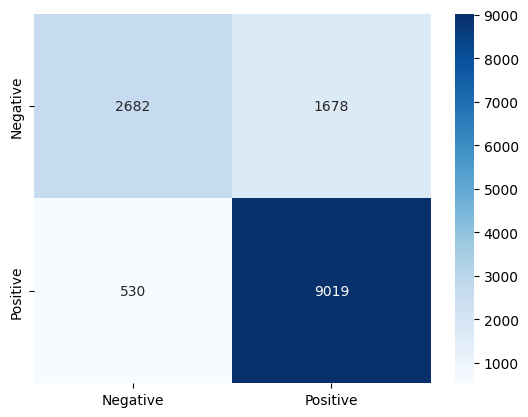

In [50]:
#import seaborn as sns
sns.heatmap(cm_yelp_data, annot=True,cmap='Blues',fmt='g')